<a href="https://colab.research.google.com/github/EricWcr7/Uoft-Course-Material/blob/master/JSC270_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Click here to open this notebook in Google Colab](https://colab.research.google.com/github/EricWcr7/JSC270_HW2_2025_YWang
/blob/main/JSC270_A2.ipynb)


#Exploring income and its correlated factors in 1994 America

***
Here are the libraries and packages for this data analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

***
Importing Data:

In [3]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

***
***
##Initial Data Exploration

***
***Intial Data Exploration Q1 Starts***
1. Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?

In [4]:
income94.info() # Check for dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


***Initial Data Exploration Q1 Ends***

***
***Initial Data Exploration Q2 Starts***
2. How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.

In [5]:
income94.shape # Check the total rows in this dataset

(32561, 15)

In [6]:
print((income94 == " ?").sum()) # Have checked "?" and "? " before and the results are all 0

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64


In [7]:
# Strip leading and trailing whitespace from all string columns for safety search in the print statement
income94 = income94.applymap(lambda x: x.strip() if isinstance(x, str) else x)
print((income94 == '?').sum())

<ipython-input-7-eff892fd32da>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  income94 = income94.applymap(lambda x: x.strip() if isinstance(x, str) else x)


age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64


In [8]:
rows_with_question_mark = income94.apply(lambda row: '?' in row.values, axis=1).sum() # Count rows that contain at least one "?" in any of the variable columns
print(f"Number of rows containing '?': {rows_with_question_mark}")

Number of rows containing '?': 2399


In [9]:
income94 = income94.replace('?', np.nan) # Cast the missing values to NaN
income94[income94["fnlwgt"] == 304873] # Check an instance that whether the changes applied.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K


In [10]:
# Count missing values and rename the column
missing_values_per_column = income94.isna().sum().rename("NaN Counts")

# Display missing value counts with the new column name
missing_values_per_column

,NaN Counts
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


***Initial Data Exploration Q2 Ends***

***
***Initial Data Exploration Q3 Starts***
3. Individually plot the distributions of capital_gain and capital_loss.  Do you think these variables should be transformed to categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).

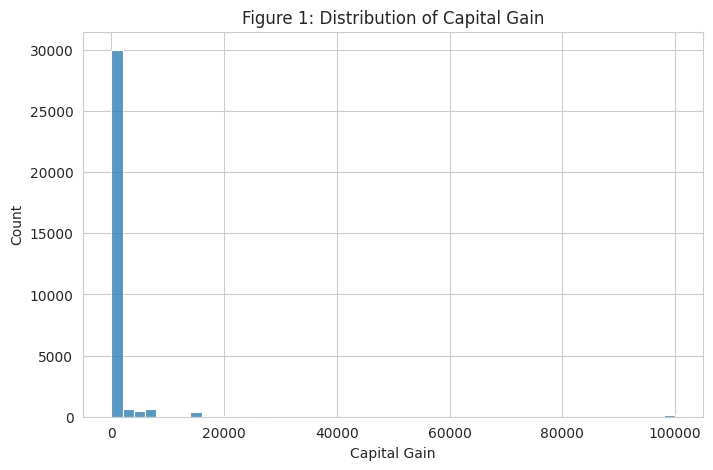

In [11]:
# Set style for better visualization
sns.set_style("whitegrid")

# Plot histogram for capital_gain
plt.figure(figsize=(8, 5))
sns.histplot(income94['capital_gain'], bins=50, kde=False)
plt.title("Figure 1: Distribution of Capital Gain")
plt.xlabel("Capital Gain")
plt.ylabel("Count")
plt.show()

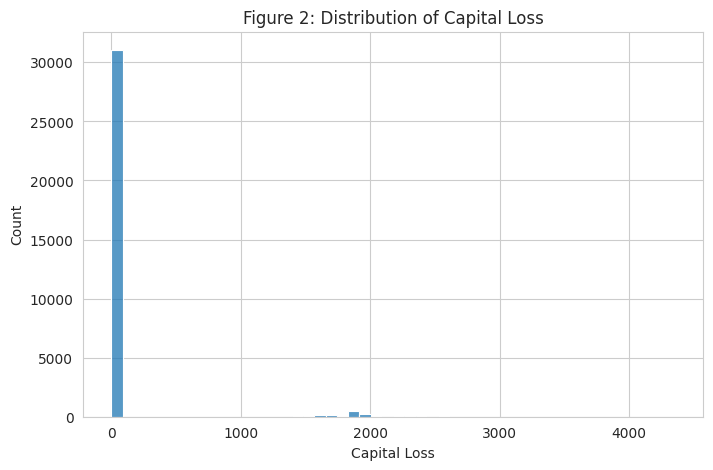

In [12]:
# Plot histogram for capital_loss
plt.figure(figsize=(8, 5))
sns.histplot(income94['capital_loss'], bins=50, kde=False)
plt.title("Figure 2: Distribution of Capital Loss")
plt.xlabel("Capital Loss")
plt.ylabel("Count")
plt.show()

In [13]:
income94['capital_loss'].value_counts() # Confirm with the histogram

,count
capital_loss,
0,31042
1902,202
1977,168
1887,159
1848,51
...,...
2080,1
1539,1
1844,1


In [14]:
income94['capital_gain'].value_counts() # Confirm with the histogram

,count
capital_gain,
0,29849
15024,347
7688,284
7298,246
99999,159
...,...
1111,1
2538,1
22040,1


In [15]:
# Create binary categorical variables
income94['capital_gain_group'] = income94['capital_gain'].apply(lambda x: 'Has Gain' if x > 0 else 'No Gain')
income94['capital_loss_group'] = income94['capital_loss'].apply(lambda x: 'Has Loss' if x > 0 else 'No Loss')

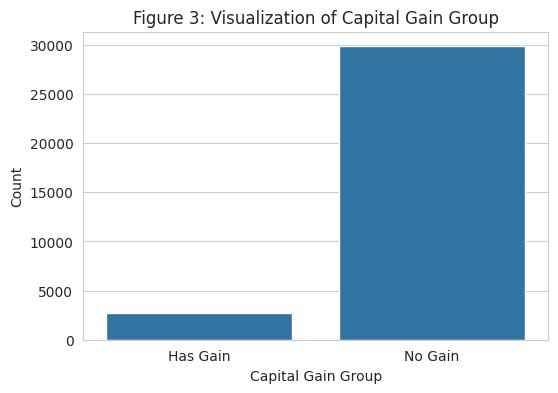

In [16]:
# Plot bar plot for capital gain group
plt.figure(figsize=(6,4))
sns.countplot(x='capital_gain_group', data=income94)
plt.title("Figure 3: Visualization of Capital Gain Group")
plt.xlabel("Capital Gain Group")
plt.ylabel("Count")
plt.show()

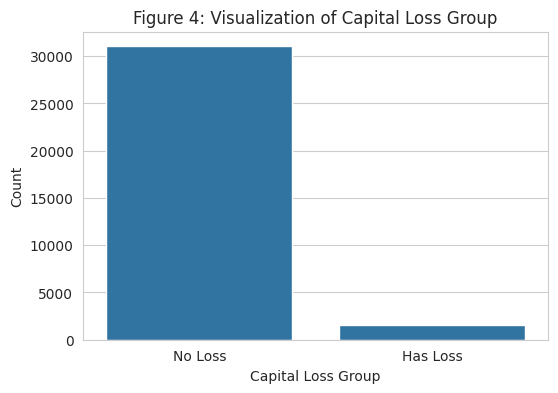

In [17]:
# Plot bar plot for capital loss group
plt.figure(figsize=(6,4))
sns.countplot(x='capital_loss_group', data=income94)
plt.title("Figure 4: Visualization of Capital Loss Group")
plt.xlabel("Capital Loss Group")
plt.ylabel("Count")
plt.show()

**Initial Data Exploration Q3 Ends**
***

***Initial Data Exploration Q4 Starts***

4. The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that sample represents based on location (and sometimes, other factors).  More information is provided in  this text file description of the data.
Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.

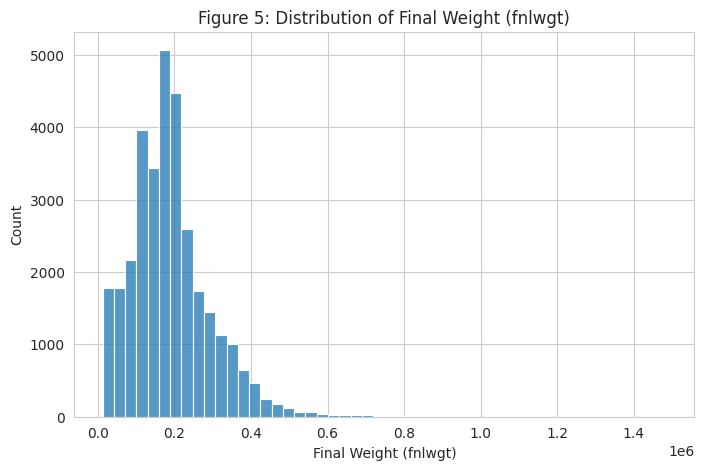

In [18]:
# Plot histogram for fnlwgt
plt.figure(figsize=(8, 5))
sns.histplot(income94['fnlwgt'], bins=50, kde=False)  # kde=False removes the density line
plt.title("Figure 5: Distribution of Final Weight (fnlwgt)")
plt.xlabel("Final Weight (fnlwgt)")
plt.ylabel("Count")
plt.show()

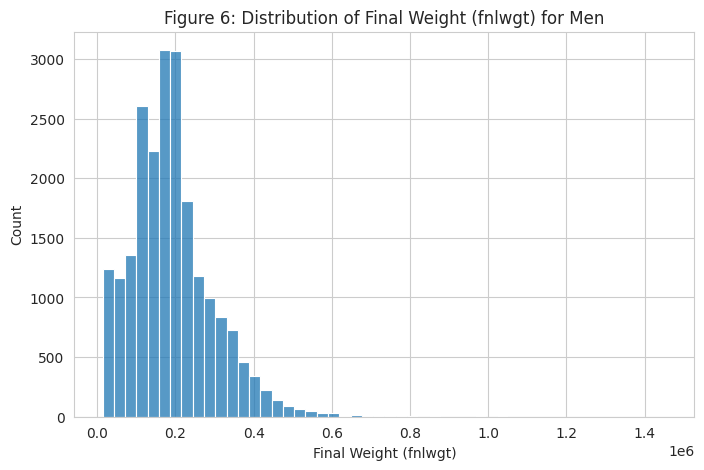

In [19]:
# Filter the dataset for men
men_fnlwgt = income94[income94['sex'] == 'Male']['fnlwgt']

# Plot histogram for fnlwgt of men
plt.figure(figsize=(8, 5))
sns.histplot(men_fnlwgt, bins=50, kde=False)  # kde=False removes the density line
plt.title("Figure 6: Distribution of Final Weight (fnlwgt) for Men")
plt.xlabel("Final Weight (fnlwgt)")
plt.ylabel("Count")
plt.show()

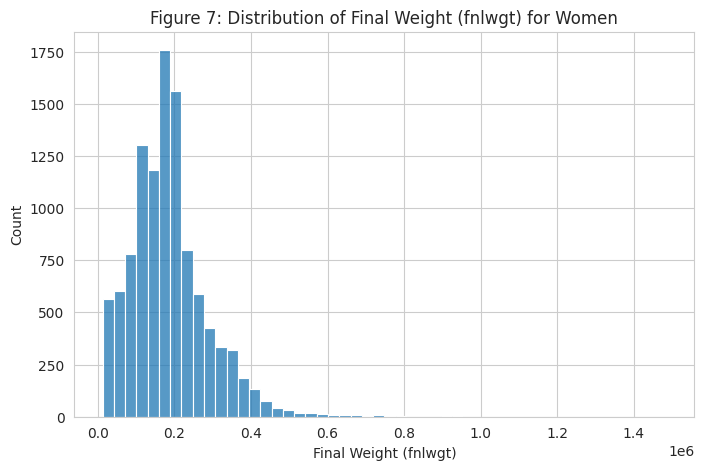

In [20]:
# Filter the dataset for men
women_fnlwgt = income94[income94['sex'] == 'Female']['fnlwgt']

# Plot histogram for fnlwgt of men
plt.figure(figsize=(8, 5))
sns.histplot(women_fnlwgt, bins=50, kde=False)  # kde=False removes the density line
plt.title("Figure 7: Distribution of Final Weight (fnlwgt) for Women")
plt.xlabel("Final Weight (fnlwgt)")
plt.ylabel("Count")
plt.show()


***Initial Data Exploration Q4 Ends***

***
## Correlation
***
1. Find the correlations between age, education_num, and hours_per_week.
  * Do any of the variables appear to be correlated? How did you make your assessment?
  * Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?

  * How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?
  * Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?
***
***Correlation Q1(a) Starts***

Do any of the variables appear to be correlated? How did you make your assessment?

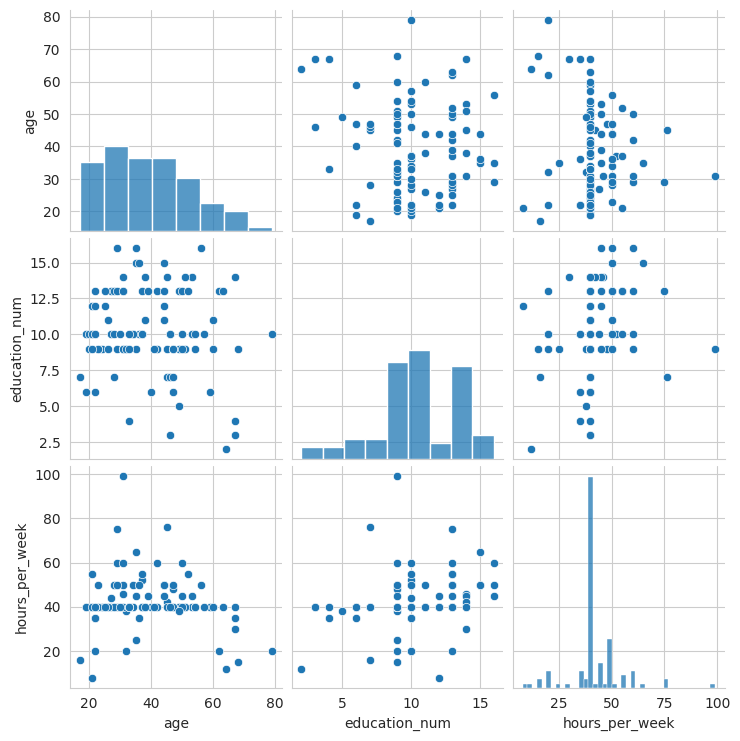

In [21]:
# Select only the required columns
columns_keep = ["age", "education_num", "hours_per_week"]

# Take a subset of 100 random samples for efficiency
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(income94.shape[0]), size=100, replace=False)

# Create a subset of the dataset
subset_data = income94.iloc[indices][columns_keep]

# Generate the scatterplot matrix (pairplot)
_ = sns.pairplot(data=subset_data)

***Correlation Q1(a) Ends***


***
***Correlation Q1(b) Starts***

Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?

In [22]:
# Compute correlation matrix
correlation_matrix = income94[["age", "education_num", "hours_per_week"]].corr()

# Display correlation matrix
correlation_matrix

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


In [23]:
# Pearson correlation test
stat, p = stats.pearsonr(income94['education_num'], income94['hours_per_week'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.148, p=0.000


***Correlation Q1(b) Ends***

***
***Correlation Q1(c) Starts***

How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?

In [24]:
# Subset the data by sex
male_data = income94[income94['sex'] == 'Male']
female_data = income94[income94['sex'] == 'Female']

stat_male, p_male = stats.pearsonr(male_data['education_num'], male_data['age'])
print('stat_male=%.3f, p_male=%.3f' % (stat_male, p_male))
6
stat_female, p_female = stats.pearsonr(female_data['education_num'], female_data['age'])
print('stat_female=%.3f, p_female=%.3f' % (stat_female, p_female))

stat_male=0.060, p_male=0.000
stat_female=-0.018, p_female=0.063


***Correlation Q1(c) Ends***

***
***Correlation Q1(d) Starts***

Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?

In [25]:
# Compute covariance matrix
cov_matrix = income94[['education_num', 'hours_per_week']].cov()

# Display the result
print(cov_matrix)

                education_num  hours_per_week
education_num        6.618890        4.705338
hours_per_week       4.705338      152.458995


***Correlation Q1(d) Ends***

***
## Regression
***
1. Fit a linear regression with hours_per_week as the dependent variable and sex as the independent variable.
  * Do men tend to work more hours?
  * Add education_num as a control variable, does the trend in hours worked by men vs women remain the same? Is the coefficient for education_num statistically significant? What is the 95% confidence interval?
  * Now add gross_income_group as a binary variable in the model and compare this model with the models including (i) only sex and (ii) sex and education_num.  Write down the interpretation for the coefficient for sex in each model.  What statistic(s) can help to decide which model is the “best”?  How do the three models compare?
***
***Regression Q1(a) Starts***

Do men tend to work more hours?

In [26]:
int_columns = income94.select_dtypes(include=['int64']).columns

# Convert them to float
income94[int_columns] = income94[int_columns].astype(float)

# Display the updated data types
print(income94.dtypes)

age                   float64
workclass              object
fnlwgt                float64
education              object
education_num         float64
marital_status         object
occupation             object
relationship           object
race                   object
sex                    object
capital_gain          float64
capital_loss          float64
hours_per_week        float64
native_country         object
gross_income_group     object
capital_gain_group     object
capital_loss_group     object
dtype: object


In [27]:
# Fit the linear regression model using formula notation
reg1 = smf.ols('hours_per_week ~ sex', data=income94).fit()

# Display the regression summary
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:24:46   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.4104      0.116    314.412      

***Regression Q1(a) Ends***

***
***Regression Q1(b) Starts***

Add education_num as a control variable, does the trend in hours worked by men vs women remain the same? Is the coefficient for education_num statistically significant? What is the 95% confidence interval?

In [28]:
# Fit the linear regression model using formula notation
reg2 = smf.ols('hours_per_week ~ sex + education_num', data=income94).fit()

# Display the regression summary
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:24:48   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

***Regression Q1(b) Ends***

***
***Regression Q1(c) Starts***

Now add gross_income_group as a binary variable in the model and compare this model with the models including (i) only sex and (ii) sex and education_num.  Write down the interpretation for the coefficient for sex in each model.  What statistic(s) can help to decide which model is the “best”?  How do the three models compare?

In [29]:
income94['income_binary'] = income94['gross_income_group'].apply(lambda x: 1 if x == '>50K' else 0)

# Fit the linear regression model using formula notation
reg3 = smf.ols('hours_per_week ~ sex + education_num + income_binary', data=income94).fit()

# Display the regression summary
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:24:50   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        31.4218      0.288    109.184

In [30]:
# Function to compute RSE and RMSE
def model_performance(model):
    residuals = model.resid  # Get residuals
    n = len(residuals)       # Number of observations
    p = model.df_model       # Number of predictors (excluding intercept)

    # Compute RSE
    RSS = sum(residuals**2)
    RSE = np.sqrt(RSS / (n - p - 1))

    # Compute RMSE (same as RSE when all predictors are included)
    RMSE = np.sqrt(RSS / n)

    # Get Adjusted R²
    adj_r2 = model.rsquared_adj

    return RSE, RMSE, adj_r2

# Compute metrics for each model
rse1, rmse1, adj_r2_1 = model_performance(reg1)
rse2, rmse2, adj_r2_2 = model_performance(reg2)
rse3, rmse3, adj_r2_3 = model_performance(reg3)

# Print results
print(f"Model 1 (Sex Only) -> RSE: {rse1:.3f}, RMSE: {rmse1:.3f}, Adjusted R²: {adj_r2_1:.3f}")
print(f"Model 2 (Sex + Education) -> RSE: {rse2:.3f}, RMSE: {rmse2:.3f}, Adjusted R²: {adj_r2_2:.3f}")
print(f"Model 3 (Sex + Education + Income) -> RSE: {rse3:.3f}, RMSE: {rmse3:.3f}, Adjusted R²: {adj_r2_3:.3f}")


Model 1 (Sex Only) -> RSE: 12.019, RMSE: 12.018, Adjusted R²: 0.053
Model 2 (Sex + Education) -> RSE: 11.884, RMSE: 11.884, Adjusted R²: 0.074
Model 3 (Sex + Education + Income) -> RSE: 11.751, RMSE: 11.750, Adjusted R²: 0.094


***Regression Q1(c) Ends***

***
***
## Part 3: Report
***

In [31]:
# Fit the pre linear regression model using formula notation
reg4 = smf.ols('hours_per_week ~ sex + race + marital_status + capital_loss_group', data=income94).fit()

# Display the regression summary
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     265.5
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:24:54   Log-Likelihood:            -1.2652e+05
No. Observations:               32561   AIC:                         2.531e+05
Df Residuals:                   32548   BIC:                         2.532e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [32]:
# Fit the reduced linear regression model without race
reg5 = smf.ols('hours_per_week ~ sex + marital_status + capital_loss_group', data=income94).fit()

# Display the regression summary
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     397.0
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:25:13   Log-Likelihood:            -1.2653e+05
No. Observations:               32561   AIC:                         2.531e+05
Df Residuals:                   32552   BIC:                         2.531e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [33]:
# Fit the reduced linear regression model without race, education
reg6 = smf.ols('hours_per_week ~ sex + capital_loss_group', data=income94).fit()

# Display the regression summary
print(reg6.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     934.0
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:25:28   Log-Likelihood:            -1.2713e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32558   BIC:                         2.543e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [34]:
rse5, rmse5, adj_r2_5 = model_performance(reg5)
rse6, rmse6, adj_r2_6 = model_performance(reg6)

# Print results
print(f"Model 5 -> RSE: {rse5:.3f}, RMSE: {rmse5:.3f}, Adjusted R²: {adj_r2_5:.3f}")
print(f"Model 6 -> RSE: {rse6:.3f}, RMSE: {rmse6:.3f}, Adjusted R²: {adj_r2_6:.3f}")

Model 5 -> RSE: 11.787, RMSE: 11.786, Adjusted R²: 0.089
Model 6 -> RSE: 12.008, RMSE: 12.008, Adjusted R²: 0.054
